In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns', 500)


import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime as dt # dates module
from datetime import date
import calendar
import time          #to get the system time

import plotly.express as px #helps in plotting
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [3]:
print(os.listdir('../input/nyc-taxi-trip-duration/'))

['sample_submission.zip', 'test.zip', 'train.zip']


From the above code cell we can observe that all the csv files that we might need are zipped.

So the first thing we need to do is to unzip the files

In [4]:
!unzip ../input/nyc-taxi-trip-duration/train.zip
!unzip ../input/nyc-taxi-trip-duration/test.zip

Archive:  ../input/nyc-taxi-trip-duration/train.zip
  inflating: train.csv               
Archive:  ../input/nyc-taxi-trip-duration/test.zip
  inflating: test.csv                


In [5]:
!ls

__notebook_source__.ipynb  test.csv  train.csv


#### Obtaining the train data from the csv file

In [6]:
s = time.time()
train_fr_1 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv')
train_fr_2 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv')
train_fr = pd.concat([train_fr_1, train_fr_2])
train_fr_new = train_fr[['id', 'total_distance']]
train_df = pd.read_csv('../input/new-york-city-taxi-with-osrm/train.csv')
train = pd.merge(train_df, train_fr_new, on = 'id', how = 'left')
end = time.time()
print("Time taken by above cell is {}.".format((end-s)))

Time taken by above cell is 20.92748522758484.


In [7]:
display(train_fr_1.head())
display(train_fr_2.head())

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id0363241,3rd Avenue,East 79th Street,2603.4,211.8,4,3rd Avenue|3rd Avenue|East 79th Street|East 79...,606.1|1948.8|48.5|0,49.5|159.1|3.2|0,depart|fork|turn|arrive,right|slight right|left|arrive,"-73.971925,40.75418|-73.968457,40.758954|-73.9..."
1,id1188175,5th Avenue,West 30th Street,1526.9,195.0,5,5th Avenue|West 29th Street|8th Avenue|West 30...,359|858.4|79|230.4|0,52.4|106|10.9|25.7|0,depart|turn|turn|turn|arrive,none|right|right|right|arrive,"-73.984788,40.748127|-73.986846,40.745301|-73...."
2,id3584231,2nd Avenue,Thompson Street,2564.9,341.0,8,2nd Avenue|East 13th Street|5th Avenue|Washing...,688.4|836.5|496.1|164.2|154.9|154.2|70.7|0,84.5|109|69.9|25.8|24.7|19.3|7.8|0,depart|turn|turn|end of road|continue|continue...,right|right|left|right|left|left|right|arrive,"-73.981498,40.737077|-73.985444,40.731658|-73...."
3,id3283815,Lexington Avenue,East 84th Street,3886.2,331.9,7,Lexington Avenue|East 49th Street|Park Avenue|...,37|147.7|78.6|745.6|2755.9|121.4|0,6.6|13.8|9.2|62.1|222.8|17.4|0,depart|turn|turn|turn|turn|turn|arrive,right|right|right|right|left|right|arrive,"-73.972608,40.756161|-73.97282,40.75587|-73.97..."
4,id0420326,West 16th Street,West 31st Street,1706.4,235.7,4,West 16th Street|6th Avenue|West 31st Street|W...,288.4|1170.4|247.6|0,41.7|166.3|27.7|0,depart|turn|turn|arrive,none|left|left|arrive,"-73.998865,40.739945|-73.995874,40.738686|-73...."


In [8]:
train_fr_1 = pd.read_csv('../input/weather-data-in-new-york-city-2016/weather_data_nyc_centralpark_2016(1).csv')

In [9]:
display(train_fr_1)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
...,...,...,...,...,...,...,...
361,27-12-2016,60,40,50.0,0,0,0
362,28-12-2016,40,34,37.0,0,0,0
363,29-12-2016,46,33,39.5,0.39,0,0
364,30-12-2016,40,33,36.5,0.01,T,0


In [10]:
train_fr_1.dtypes

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation           object
snow fall               object
snow depth              object
dtype: object

In [11]:
del(train_fr_1)
del(train_fr_2)
del(train_fr_new)

In [12]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9


In [13]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,total_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458643e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,4.626383e+03
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,5.303878e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.666100e+03
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.755100e+03
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.113800e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,9.420420e+04


In [14]:
print("The number of rows in the dataset is : ",train.shape[0])
print("The number of columns in the dataset is : ",train.shape[1])

The number of rows in the dataset is :  1458644
The number of columns in the dataset is :  12


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  total_distance      1458643 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 144.7+ MB


In [16]:
display(train.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
total_distance        float64
dtype: object

In [17]:
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [18]:
train['counter']=0

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

#Extracting month
train['pickup_month'] = pd.DatetimeIndex(train['pickup_datetime']).month
train['dropoff_month'] = pd.DatetimeIndex(train['dropoff_datetime']).month
#Extracting day
train['pickup_day'] = pd.DatetimeIndex(train['pickup_datetime']).day
train['dropoff_day'] = pd.DatetimeIndex(train['dropoff_datetime']).day
#Extracting DOY
train['pickup_doy'] = pd.DatetimeIndex(train['pickup_datetime']).dayofyear
train['dropoff_doy'] = pd.DatetimeIndex(train['dropoff_datetime']).dayofyear
#Extracting DOW
train['pickup_dow'] = pd.DatetimeIndex(train['pickup_datetime']).weekday
train['dropoff_dow'] = pd.DatetimeIndex(train['dropoff_datetime']).weekday
#Extracting hour
train['pickup_hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour
train['dropoff_hour'] = pd.DatetimeIndex(train['dropoff_datetime']).hour
#Extracting Minute
train['pickup_minute'] = pd.DatetimeIndex(train['pickup_datetime']).minute
train['dropoff_minute'] = pd.DatetimeIndex(train['dropoff_datetime']).minute

In [19]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

In [20]:
from sklearn.cluster import MiniBatchKMeans

coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [21]:
display(train.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
total_distance               float64
counter                        int64
pickup_month                   int64
dropoff_month                  int64
pickup_day                     int64
dropoff_day                    int64
pickup_doy                     int64
dropoff_doy                    int64
pickup_dow                     int64
dropoff_dow                    int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_minute                  int64
dropoff_minute                 int64
pickup_cluster                 int32
dropoff_cluster                int32
d

In [22]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_cluster,dropoff_cluster,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32,67,54,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54,41,55,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10,33,7,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39,56,49,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38,57,51,179.473585


In [23]:
train['counter']=0
vendor_distributions = train.groupby(by='vendor_id',as_index=False).counter.count()
display(vendor_distributions)

,vendor_id,counter
0,1,669301
1,2,769882


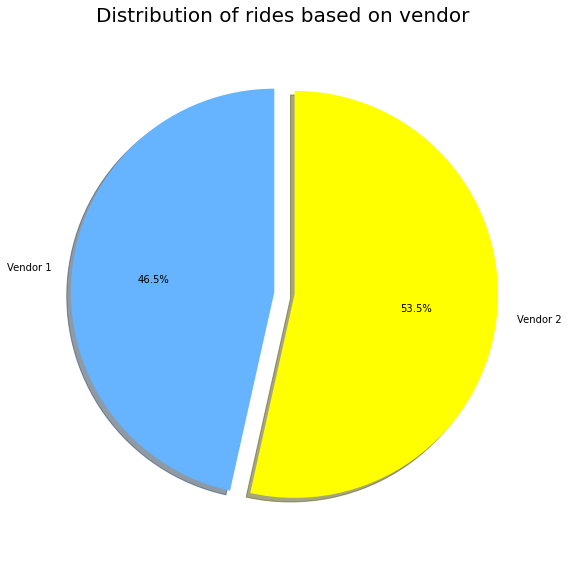

In [24]:
sizes = [vendor_distributions.counter[0],vendor_distributions.counter[1]]
labels = ['Vendor 1','Vendor 2']
explode = (0.1, 0)
colors = ['#66b3ff','yellow']

plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Distribution of rides based on vendor',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

In [25]:
passenger_dist = train.groupby(by='passenger_count',as_index=False).counter.count()
display(passenger_dist)

,passenger_count,counter
0,0,53
1,1,1019950
2,2,207167
3,3,59104
4,4,28011
5,5,77127
6,6,47771


In [26]:
fig = px.line(passenger_dist, 
             x="passenger_count", y="counter", 
             title='Number of rides based on number of passengers', 
             text='counter',
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [27]:
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

In [28]:
monthly_dist = train.groupby(by='pickup_month',as_index=False)[['counter']].count()
display(monthly_dist)
#month_map = montly_dist.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})
#monthly_map

monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
display(monthly_dist)

,pickup_month,counter
0,1,226764
1,2,235370
2,3,252812
3,4,248210
4,5,244940
5,6,231087


,pickup_month,counter
0,Jan,226764
1,Feb,235370
2,Mar,252812
3,Apr,248210
4,May,244940
5,Jun,231087


In [29]:
fig = px.line(monthly_dist, 
             x="pickup_month", y="counter", 
             title='Distribution of number of rides based on month', 
             text='counter',
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [30]:
monthly_dist = train.groupby(['pickup_month','pickup_day'],as_index=False)[['counter']].count()
display(monthly_dist)
print(monthly_dist.pickup_month.unique())
monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
display(monthly_dist)
print(monthly_dist.pickup_month.unique())

,pickup_month,pickup_day,counter
0,1,1,7013
1,1,2,6427
2,1,3,6253
3,1,4,6635
4,1,5,7104
...,...,...,...
177,6,26,6954
178,6,27,7200
179,6,28,7154
180,6,29,7540


[1 2 3 4 5 6]


,pickup_month,pickup_day,counter
0,Jan,1,7013
1,Jan,2,6427
2,Jan,3,6253
3,Jan,4,6635
4,Jan,5,7104
...,...,...,...
177,Jun,26,6954
178,Jun,27,7200
179,Jun,28,7154
180,Jun,29,7540


['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


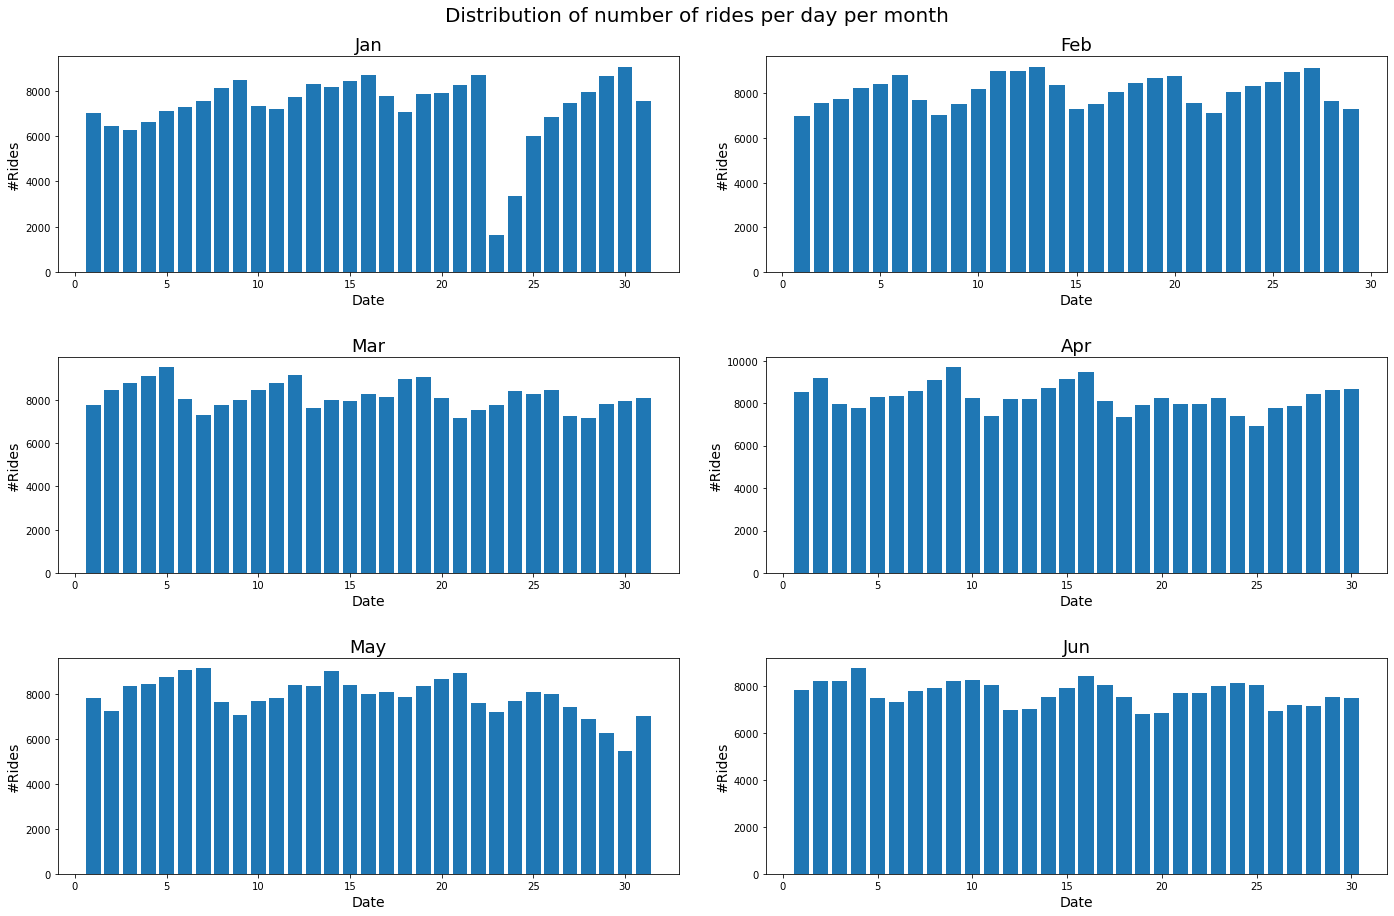

In [31]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(6, 2, 3)
plt.suptitle('Distribution of number of rides per day per month',fontsize = 20,y=1.0)
k=1
for i in monthly_dist.pickup_month.unique():
    plotter = monthly_dist.loc[monthly_dist['pickup_month']== i]
    
    ax = fig.add_subplot(6,2,k)
    ax.bar(plotter['pickup_day'],plotter['counter'])
    plt.title(i,fontsize=18)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('#Rides',fontsize=14)
    k+=1
plt.tight_layout(pad=3.0)

In [32]:
#week_day = monthly_dist.loc[monthly_dist['pickup_day'].isin([1,2,3,4,5])]
monthly_dist = train.groupby(['pickup_dow'],as_index=False)[['counter']].count()
#plt.plot

In [33]:
monthly_dist = train.groupby(['pickup_month','pickup_day','pickup_dow'],as_index=False)[['counter']].count()
monthly_dist['pickup_month'] = monthly_dist['pickup_month'].apply(lambda x: calendar.month_abbr[x])
def plotter_dow(df,mth) : 
    wk_day = df.loc[df['pickup_dow'].isin([0,1,2,3,4])]
    we_day = df.loc[df['pickup_dow'].isin([5,6])]
    #tue = df.loc[df['pickup_dow'] == 1]
    #wed = df.loc[df['pickup_dow'] == 2]
    #thu = df.loc[df['pickup_dow'] == 3]
    #fri = df.loc[df['pickup_dow'] == 4]
    #sat = df.loc[df['pickup_dow'] == 5]
    #sun = df.loc[df['pickup_dow'] == 6]
    ax = fig.add_subplot(6,3,k)
    ax.bar(wk_day['pickup_day'],wk_day['counter'],color='black',label='weekday')
    ax.bar(we_day['pickup_day'],we_day['counter'],color='gold',label='weekend')
    #ax.bar(mon['pickup_day'],mon['counter'],color='blue')
    #ax.bar(tue['pickup_day'],tue['counter'],color='blue')
    #ax.bar(wed['pickup_day'],wed['counter'],color='blue')
    #ax.bar(thu['pickup_day'],thu['counter'],color='blue')
    #ax.bar(fri['pickup_day'],fri['counter'],color='blue')
    #ax.bar(sat['pickup_day'],sat['counter'],color='red')
    #ax.bar(sun['pickup_day'],sun['counter'],color='red')
    plt.title(mth,fontsize=18)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('#Rides',fontsize=14)

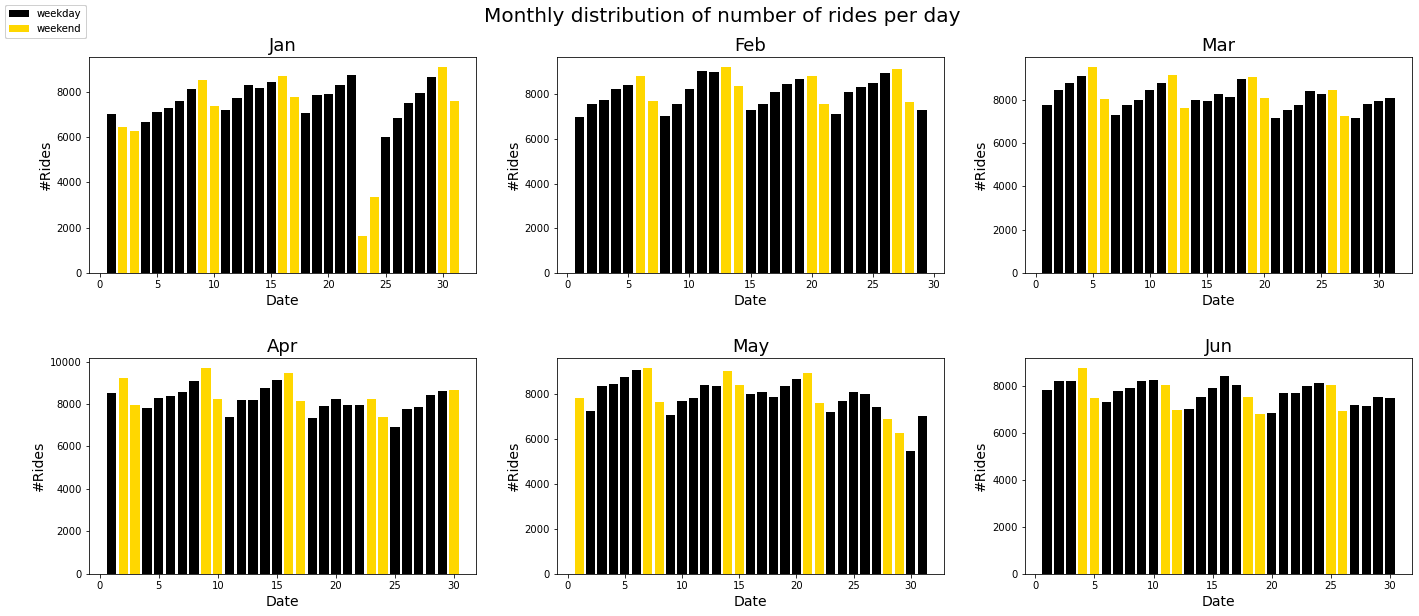

In [34]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(6, 3, 2)
plt.suptitle('Monthly distribution of number of rides per day',fontsize = 20,y=1.0)
k=1
for i in monthly_dist.pickup_month.unique():
    plotter = monthly_dist.loc[monthly_dist['pickup_month']== i]
    plotter_dow(plotter,i)
    k+=1
plt.tight_layout(pad=3.0)

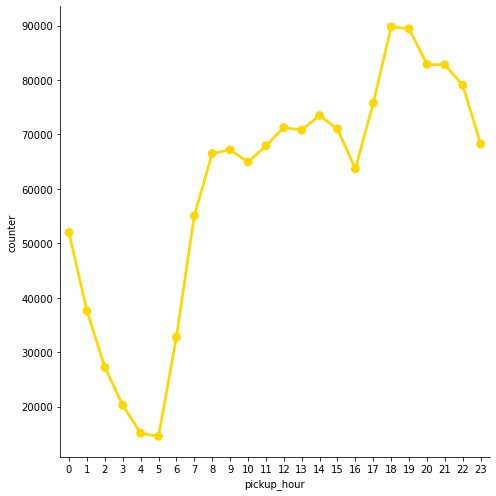

In [35]:
pickup_time = train.groupby(['pickup_hour'],as_index=False)[['counter']].count()
sns.factorplot(x="pickup_hour", y="counter", data=pickup_time,color='gold',size=7,title='Number of rides per hour')

In [36]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()

fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='RdBu', title='Number of rides per hour')
fig.show()

In [37]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()
pickup_time['pickup_dow'] = pickup_time['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='Blues', title='Number of rides per hour')
fig.show()

In [38]:
pickup_time = train.groupby(['pickup_dow','pickup_hour'],as_index=False)[['counter']].count()

fig = px.treemap(pickup_time, path=['pickup_dow','pickup_hour'], values='counter',
                  color='counter', hover_data=['pickup_hour','counter'],
                  color_continuous_scale='Greens', title='Number of rides per hour')
fig.show()

In [39]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

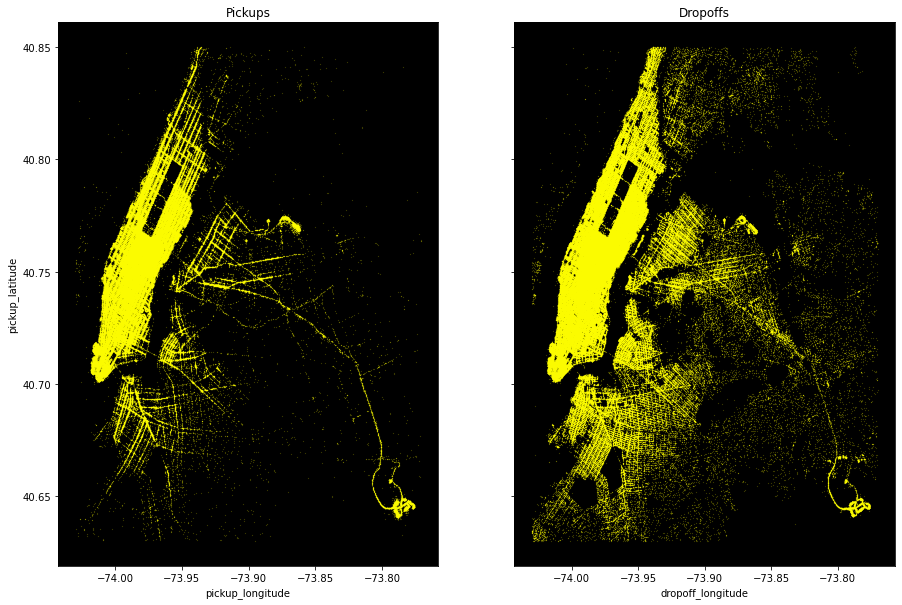

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 

In [41]:
north_rides = train.loc[train['pickup_latitude'] < train['dropoff_latitude']]
south_rides = train.loc[train['pickup_latitude'] > train['dropoff_latitude']]
east_rides = train.loc[train['pickup_longitude'] > train['dropoff_longitude']]
west_rides = train.loc[train['pickup_longitude'] < train['dropoff_longitude']]
print("Number of rides due north : ",north_rides.shape[0])
print("Number of rides due south : ",south_rides.shape[0])
print("Number of rides due west : ",west_rides.shape[0])
print("Number of rides due east : ",east_rides.shape[0])

Number of rides due north :  725176
Number of rides due south :  707733
Number of rides due west :  755731
Number of rides due east :  676894


<BarContainer object of 4 artists>

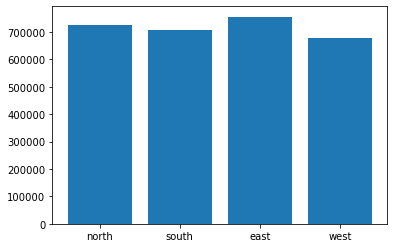

In [42]:
plt.bar(['north','south','east','west'] , [north_rides.shape[0],south_rides.shape[0],west_rides.shape[0],east_rides.shape[0]])

In [43]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_cluster,dropoff_cluster,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32,67,54,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54,41,55,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10,33,7,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39,56,49,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38,57,51,179.473585


In [44]:
df = train.groupby(['pickup_dow'],as_index=False)[['trip_duration']].mean()
df['pickup_dow'] = df['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.line(df, 
             x="pickup_dow", y="trip_duration", 
             title='Average ride time based on the day of week', 
             text=round(df['trip_duration']),
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

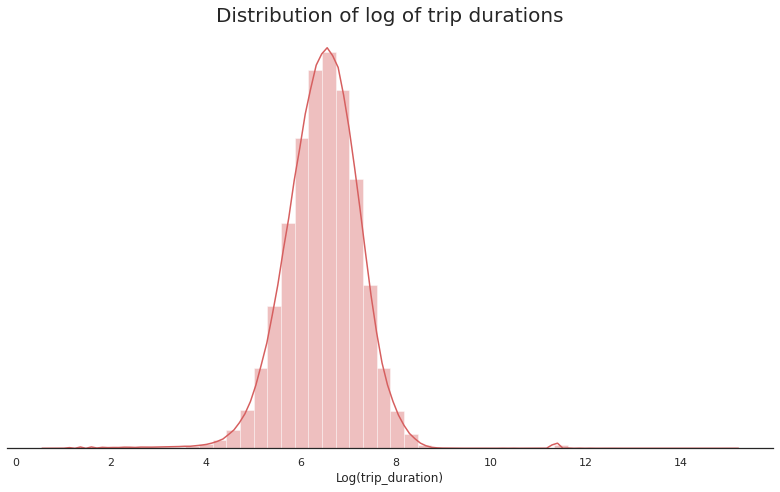

In [45]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.title('Distribution of log of trip durations',fontsize = 20)
plt.tight_layout()
plt.show()

In [46]:
train['speed_in_mpers'] = train['total_distance'] / train['trip_duration']
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_distance,counter,pickup_month,dropoff_month,pickup_day,dropoff_day,pickup_doy,dropoff_doy,pickup_dow,dropoff_dow,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_cluster,dropoff_cluster,direction,speed_in_mpers
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2009.1,0,3,3,14,14,74,74,0,0,17,17,24,32,67,54,99.970196,4.415604
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2513.2,0,6,6,12,12,164,164,6,6,0,0,43,54,41,55,-117.153768,3.790649
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11060.8,0,1,1,19,19,19,19,1,1,11,12,35,10,33,7,-159.680165,5.207533
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1779.4,0,4,4,6,6,97,97,2,2,19,19,32,39,56,49,-172.737700,4.147786
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1614.9,0,3,3,26,26,86,86,5,5,13,13,30,38,57,51,179.473585,3.712414


In [47]:
df = train.groupby(['pickup_hour'],as_index=False)[['speed_in_mpers']].mean()
#df['pickup_dow'] = df['pickup_dow'].apply(lambda x: calendar.day_abbr[x])
fig = px.line(df, 
             x="pickup_hour", y="speed_in_mpers", 
             title='Average speed based on the hour of the day', 
             #text=round(df['speed_in_mpers']),
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

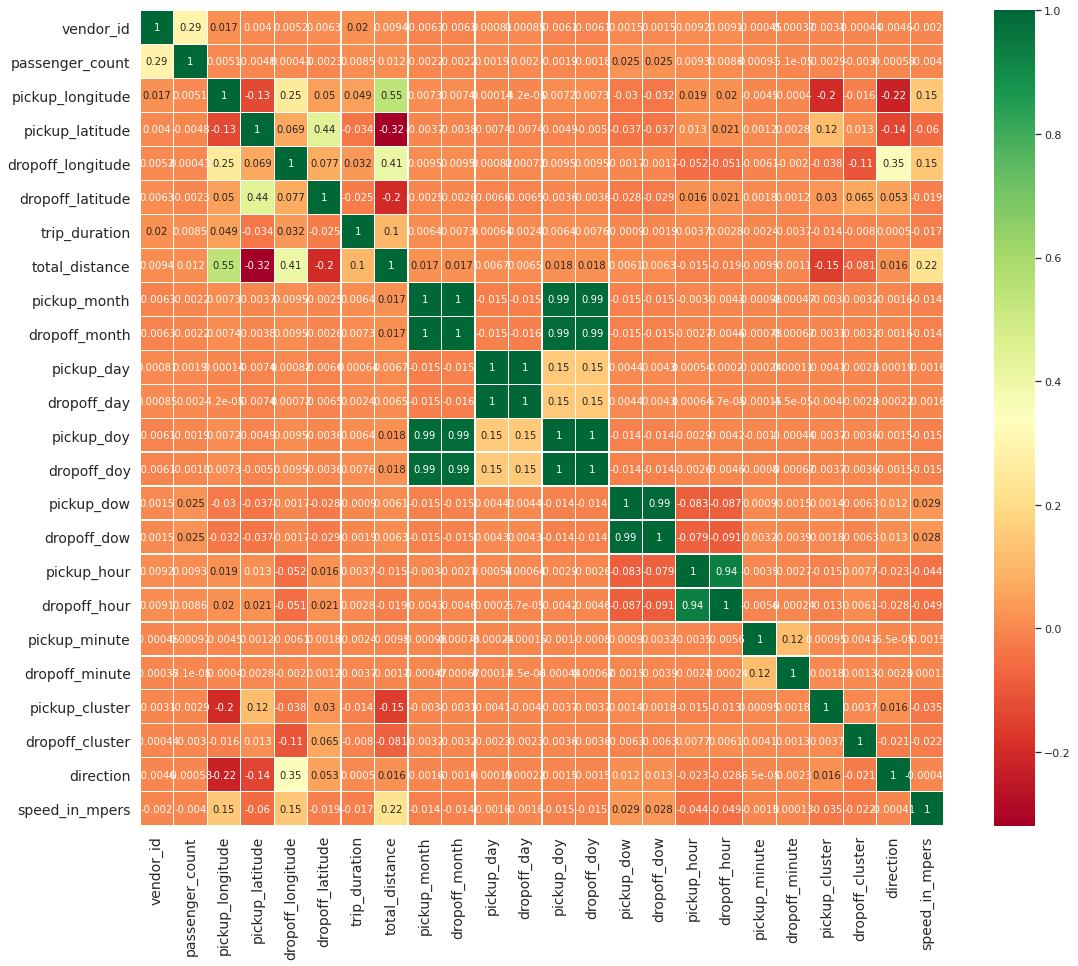

In [48]:
train = train.drop(['counter'],axis=1)
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [49]:
train.columns.values

array(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'total_distance', 'pickup_month', 'dropoff_month',
       'pickup_day', 'dropoff_day', 'pickup_doy', 'dropoff_doy',
       'pickup_dow', 'dropoff_dow', 'pickup_hour', 'dropoff_hour',
       'pickup_minute', 'dropoff_minute', 'pickup_cluster',
       'dropoff_cluster', 'direction', 'speed_in_mpers'], dtype=object)

In [50]:
display(train.isna().sum())
train = train.fillna(0)
display(train.isna().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
total_distance        1
pickup_month          0
dropoff_month         0
pickup_day            0
dropoff_day           0
pickup_doy            0
dropoff_doy           0
pickup_dow            0
dropoff_dow           0
pickup_hour           0
dropoff_hour          0
pickup_minute         0
dropoff_minute        0
pickup_cluster        0
dropoff_cluster       0
direction             0
speed_in_mpers        1
dtype: int64

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
total_distance        0
pickup_month          0
dropoff_month         0
pickup_day            0
dropoff_day           0
pickup_doy            0
dropoff_doy           0
pickup_dow            0
dropoff_dow           0
pickup_hour           0
dropoff_hour          0
pickup_minute         0
dropoff_minute        0
pickup_cluster        0
dropoff_cluster       0
direction             0
speed_in_mpers        0
dtype: int64

In [51]:
y = train['trip_duration']
x = train.drop(['id','vendor_id','trip_duration','pickup_datetime','dropoff_datetime','store_and_fwd_flag'],axis=1)
#x_train = train['pickup_datetime', 'dropoff_datetime','passenger_count', 'pickup_longitude', 'pickup_latitude',
 #      'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'total_distance', 'pickup_month', 'dropoff_month',
 #      'pickup_day', 'dropoff_day', 'pickup_doy', 'dropoff_doy','pickup_dow', 'dropoff_dow', 'pickup_hour', 'dropoff_hour',
  #     'pickup_minute', 'dropoff_minute', 'speed_in_mpers']

In [52]:
x.columns.values

array(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'total_distance',
       'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day',
       'pickup_doy', 'dropoff_doy', 'pickup_dow', 'dropoff_dow',
       'pickup_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute',
       'pickup_cluster', 'dropoff_cluster', 'direction', 'speed_in_mpers'],
      dtype=object)

In [53]:
# features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
#        'dropoff_longitude', 'dropoff_latitude', 'total_distance',
#        'pickup_month', 'dropoff_month', 'pickup_day', 'dropoff_day',
#        'pickup_doy', 'dropoff_doy', 'pickup_dow', 'dropoff_dow',
#        'pickup_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute',
#        'speed_in_mpers']

# target = 'trip_duration'

# # Get the X and y data from the DataFrame
# X = df[features]
# y = df[target]

In [54]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.1)

In [55]:
# pip install yellowbrick

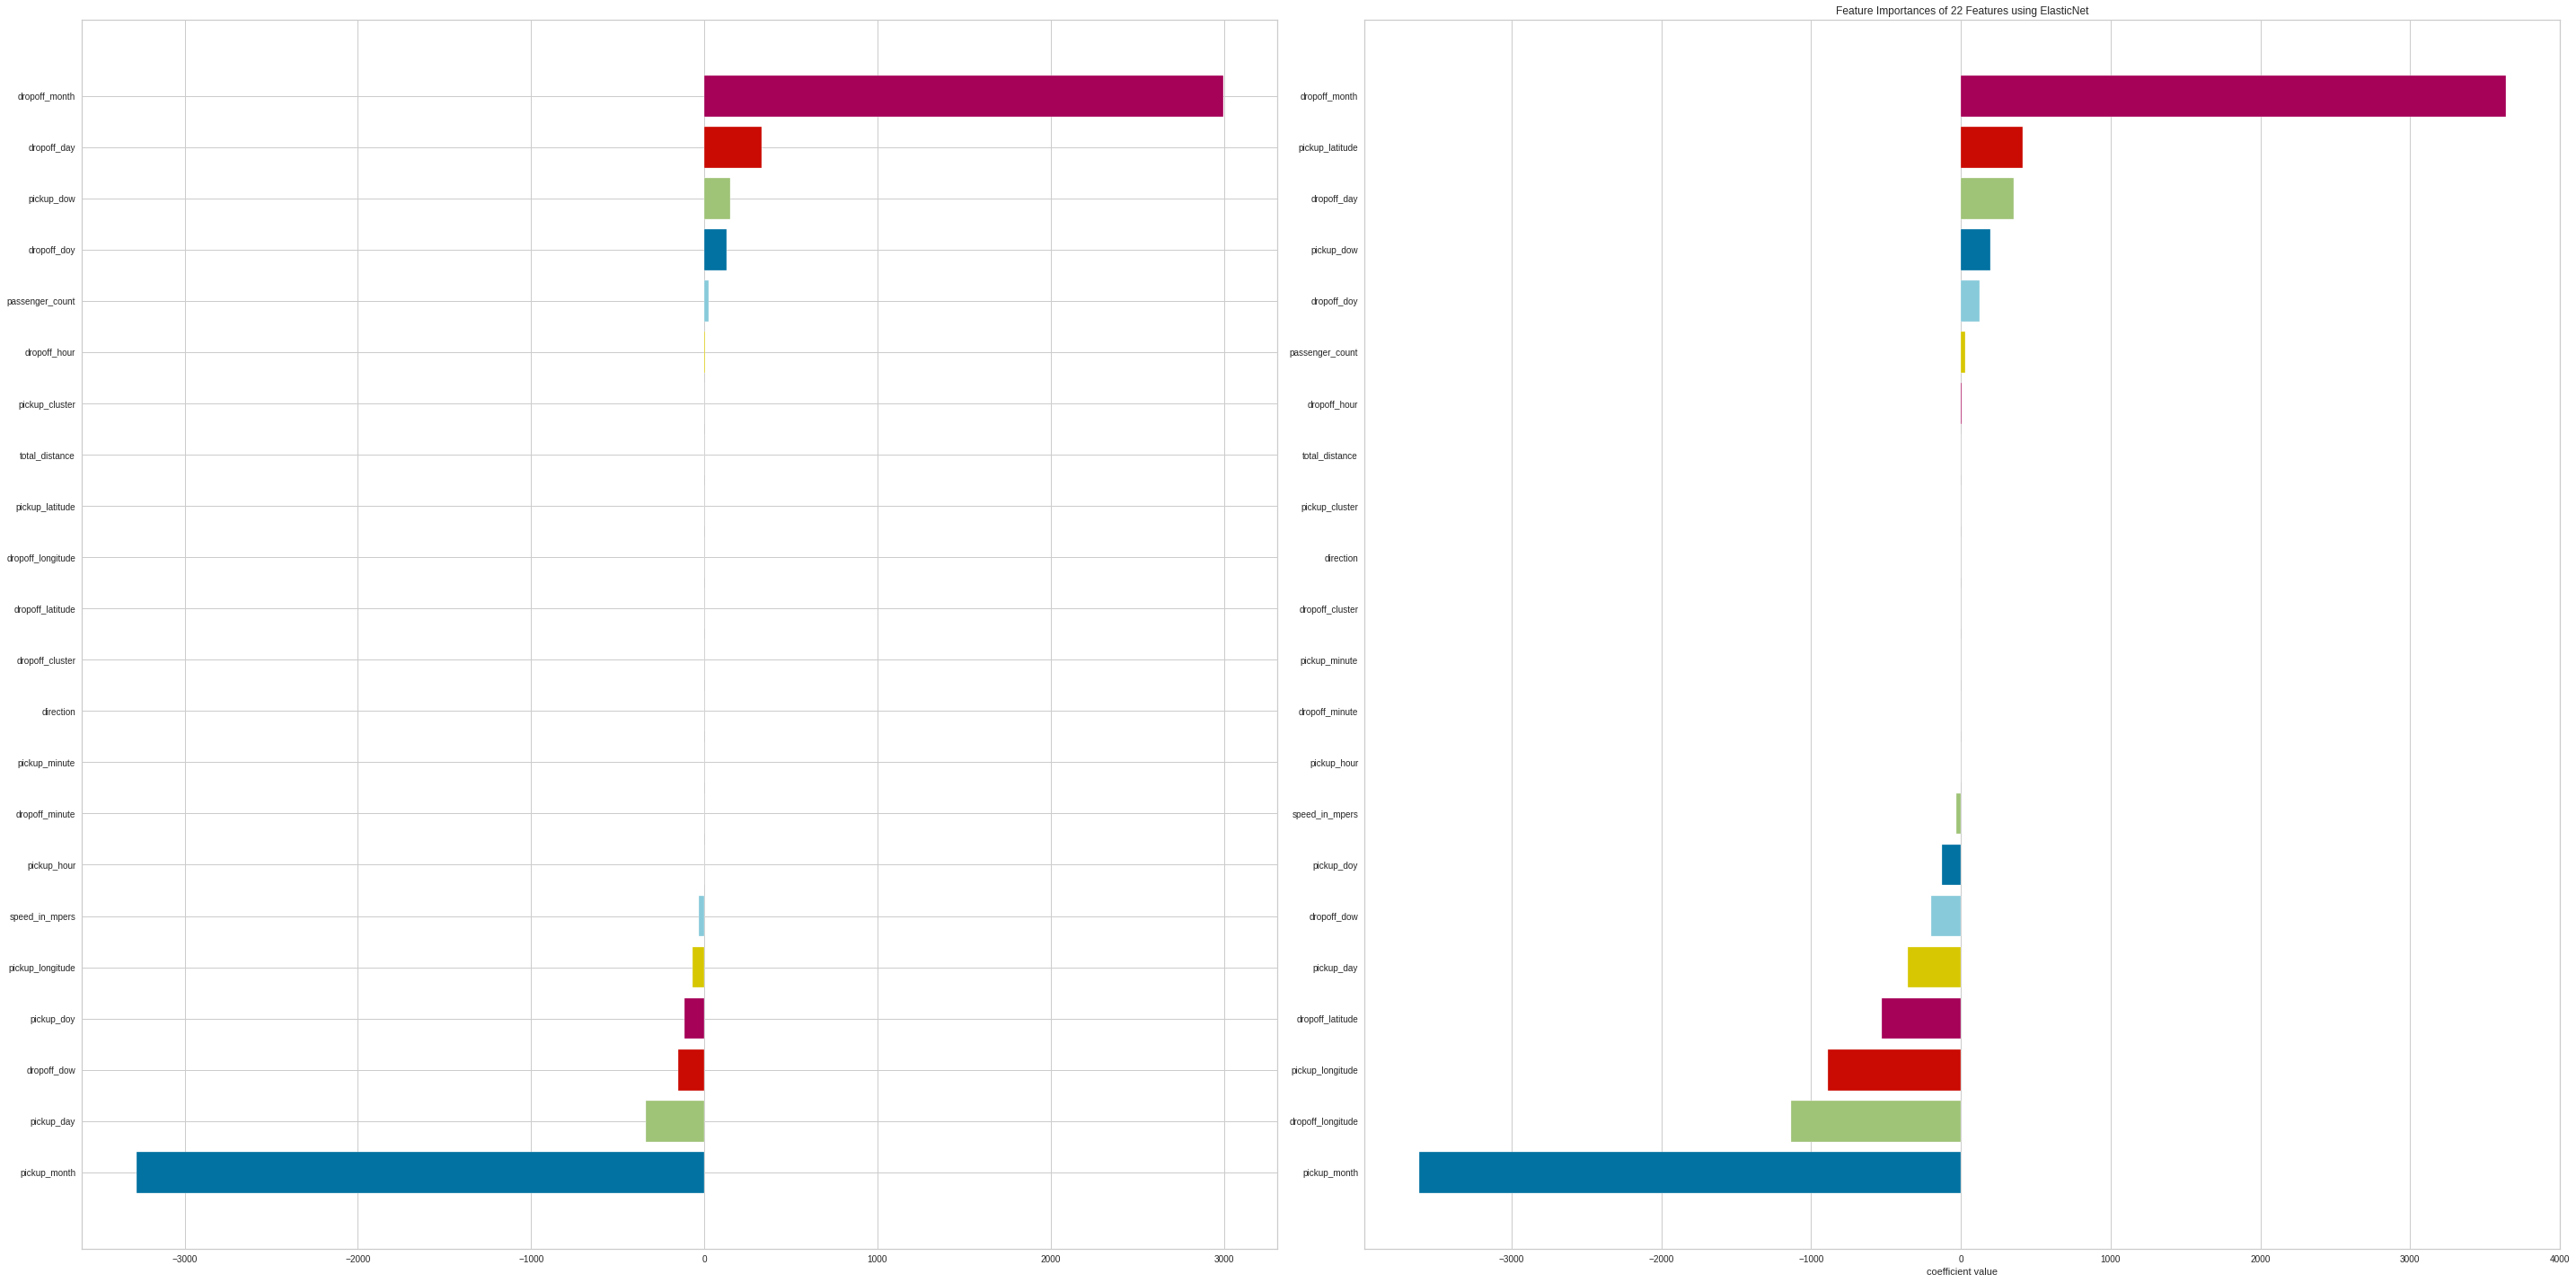

In [62]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

fig = plt.figure(figsize=(40,20))
# ax = fig.add_subplot(2,3,1)
l = [Lasso(),ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)]
x=0
for i in range(1,3):
    ax = fig.add_subplot(1,2,i)
    viz = FeatureImportances(l[x], ax=ax, stack = False, relative=False)
    viz.fit(x_train, y_train)
    x+=1
viz.poof()
# ax = fig.add_subplot(2,3,2)
# ax = fig.add_subplot(2,3,3)
# ax = fig.add_subplot(2,3,4)
# ax = fig.add_subplot(2,3,1)
# ax = fig.add_subplot(2,3,2)
# ax = fig.add_subplot(2,3,3)
# ax = fig.add_subplot(2,3,4)

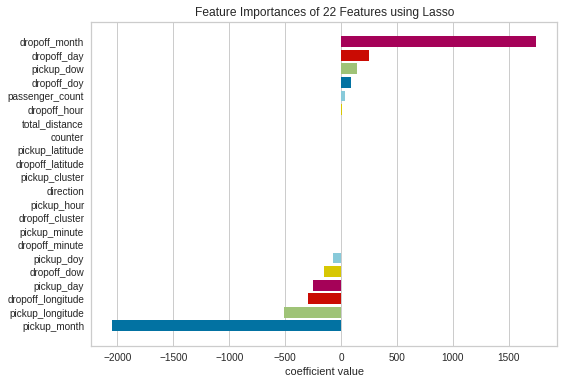

In [47]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
#labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, stack = False, relative=False)

# Fit and show the feature importances
viz.fit(x_train, y_train)
viz.poof()

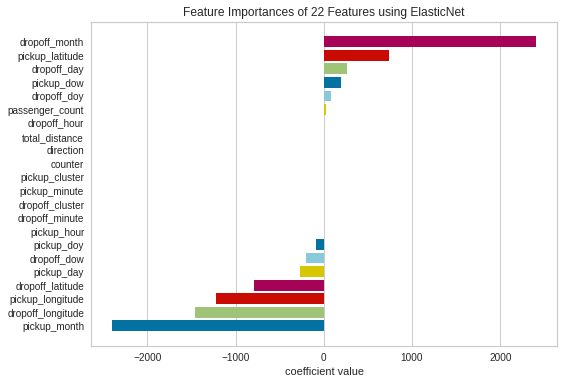

In [48]:
from sklearn.linear_model import ElasticNet
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
#labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3), ax=ax, stack = False, relative=False)

# Fit and show the feature importances
viz.fit(x_train, y_train)
viz.poof()


In [ ]:
import xgboost as xgb
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
#labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(xgb.XGBRegressor(), ax=ax, stack = False, relative=False)

# Fit and show the feature importances
viz.fit(x_train, y_train)
viz.poof()

In [63]:
visualizer = PredictionError(Lasso(), size=(800, 600))
visualizer.fit(x_train, y_train)
visualizer.score(x_val, y_val)

# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()

# Get access to the axes object and modify labels
visualizer.ax.set_xlabel("hi")
visualizer.ax.set_ylabel("hello");

NameError: name 'x_test' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
visualizer = PredictionError(Lasso(), size=(800, 600))
visualizer.fit(x_train, y_train)
visualizer.score(x_val, y_val)

# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()

# Get access to the axes object and modify labels
# visualizer.ax.set_xlabel("measured concrete strength")
# visualizer.ax.set_ylabel("predicted concrete strength");

In [ ]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete


# Create the visualizer, fit, score, and show it
viz = residuals_plot(Lasso(), x_train, y_train, x_val, y_val)

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Create the learning curve visualizer
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(LassoCV(), train_sizes=sizes, scoring='r2')
viz.fit(x_train, y_train)
viz.poof()

In [ ]:
# from sklearn.linear_model import LassoCV
# from yellowbrick.regressor import AlphaSelection

# # Create a list of alphas to cross-validate against
# alphas = np.logspace(-10, 1, 400)

# # Instantiate the linear model and visualizer
# model = LassoCV(alphas=alphas)
# visualizer = AlphaSelection(model, size=(800,600))

# visualizer.fit(x_train, y_train)
# g = visualizer.poof()

In [ ]:
m = Lasso().fit(x_train, y_train)
y_pred = m.predict(x_val) 

In [ ]:
plt.scatter(y_pred,y_val)